In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import bbknn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse

In [3]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
maize_single_cell

AnnData object with n_obs × n_vars = 10551 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features'
    obsm: 'X_umap'

In [4]:
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
arabi_single_cell

AnnData object with n_obs × n_vars = 20224 × 23339
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features'
    obsm: 'X_umap'

In [5]:
co_expressalog_map_85 = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_80_tolerance.csv')
ensmbl_to_grm = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/ensmbl_to_grm_table.csv')
co_expressalog_map_85

Arabidopsis Gene      Maize Gene
0           AT3G50620  Zm00001d029417
1           AT2G15730  Zm00001d052886
2           AT5G44040  Zm00001d027589
3           AT5G42760  Zm00001d034249
4           AT3G53470  Zm00001d031954
...               ...             ...
6230        AT2G35170  Zm00001d000053
6231        AT4G17540  Zm00001d000035
6232        AT4G16970  Zm00001d000034
6233        AT2G15980  Zm00001d000435
6234        AT5G51150  Zm00001d000436

[6235 rows x 2 columns]

In [6]:
co_expressalog_map_85 = co_expressalog_map_85.merge(right = ensmbl_to_grm, how = 'left', left_on= 'Maize Gene', right_on= 'EnsemblID')
co_expressalog_map_85 = co_expressalog_map_85.dropna()
co_expressalog_map_85 = co_expressalog_map_85[['Arabidopsis Gene','GRM Name']]


In [7]:
co_expressalog_map_85

Arabidopsis Gene       GRM Name
0           AT3G50620  GRMZM2G003530
1           AT2G15730  GRMZM5G877077
2           AT5G44040  GRMZM2G172758
3           AT5G42760  GRMZM2G068179
4           AT3G53470  GRMZM2G144982
...               ...            ...
6225        AT4G18370  GRMZM2G118646
6227        AT1G77840           EIF5
6228        AT1G71696  GRMZM2G106683
6229        AT4G27030  GRMZM2G175401
6231        AT4G17540  GRMZM2G040991

[5329 rows x 2 columns]

In [8]:
arabi_single_cell.var.index

Index(['AT1G01010', 'AT1G01020', 'AT1G01030', 'AT1G01040', 'AT1G01050',
       'AT1G03997', 'AT1G01060', 'AT1G01070', 'AT1G01080', 'AT1G01090',
       ...
       'AT5G09475', 'AT5G65800', 'AT5G66390', 'AT5G09665', 'AT5G09775',
       'AT5G67060', 'ATCG00830', 'ATCG00920', 'ATCG01000', 'ATMG00560'],
      dtype='object', length=23339)

In [9]:
arabi_single_cell.var = arabi_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'Arabidopsis Gene', how = 'left', left_on = 'features')

arabi_single_cell.var.index = arabi_single_cell.var['features'].to_list()
arabi_single_cell.var

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


features Arabidopsis Gene       GRM Name
AT1G01010  AT1G01010              NaN            NaN
AT1G01020  AT1G01020              NaN            NaN
AT1G01030  AT1G01030              NaN            NaN
AT1G01040  AT1G01040              NaN            NaN
AT1G01050  AT1G01050        AT1G01050  GRMZM2G061928
...              ...              ...            ...
AT5G67060  AT5G67060              NaN            NaN
ATCG00830  ATCG00830              NaN            NaN
ATCG00920  ATCG00920              NaN            NaN
ATCG01000  ATCG01000              NaN            NaN
ATMG00560  ATMG00560              NaN            NaN

[23339 rows x 3 columns]

In [10]:
maize_single_cell.var

features
GRMZM2G059865  GRMZM2G059865
GRMZM2G093344  GRMZM2G093344
GRMZM2G306216  GRMZM2G306216
GRMZM2G104572  GRMZM2G104572
GRMZM5G822187  GRMZM5G822187
...                      ...
GRMZM2G128549  GRMZM2G128549
GRMZM2G450231  GRMZM2G450231
GRMZM2G074773  GRMZM2G074773
GRMZM5G826672  GRMZM5G826672
GRMZM5G893089  GRMZM5G893089

[28492 rows x 1 columns]

In [11]:
co_expressalog_map_85

Arabidopsis Gene       GRM Name
0           AT3G50620  GRMZM2G003530
1           AT2G15730  GRMZM5G877077
2           AT5G44040  GRMZM2G172758
3           AT5G42760  GRMZM2G068179
4           AT3G53470  GRMZM2G144982
...               ...            ...
6225        AT4G18370  GRMZM2G118646
6227        AT1G77840           EIF5
6228        AT1G71696  GRMZM2G106683
6229        AT4G27030  GRMZM2G175401
6231        AT4G17540  GRMZM2G040991

[5329 rows x 2 columns]

In [12]:
maize_single_cell.var

features
GRMZM2G059865  GRMZM2G059865
GRMZM2G093344  GRMZM2G093344
GRMZM2G306216  GRMZM2G306216
GRMZM2G104572  GRMZM2G104572
GRMZM5G822187  GRMZM5G822187
...                      ...
GRMZM2G128549  GRMZM2G128549
GRMZM2G450231  GRMZM2G450231
GRMZM2G074773  GRMZM2G074773
GRMZM5G826672  GRMZM5G826672
GRMZM5G893089  GRMZM5G893089

[28492 rows x 1 columns]

In [13]:
maize_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'GRM Name', how = 'left', left_on = 'features')


features Arabidopsis Gene GRM Name
0      GRMZM2G059865              NaN      NaN
1      GRMZM2G093344              NaN      NaN
2      GRMZM2G306216              NaN      NaN
3      GRMZM2G104572              NaN      NaN
4      GRMZM5G822187              NaN      NaN
...              ...              ...      ...
28487  GRMZM2G128549              NaN      NaN
28488  GRMZM2G450231              NaN      NaN
28489  GRMZM2G074773              NaN      NaN
28490  GRMZM5G826672              NaN      NaN
28491  GRMZM5G893089              NaN      NaN

[28492 rows x 3 columns]

In [14]:
maize_single_cell.var = maize_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'GRM Name', how = 'left', left_on = 'features')

maize_single_cell.var.index = maize_single_cell.var['features'].to_list()
maize_single_cell.var

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


features Arabidopsis Gene GRM Name
GRMZM2G059865  GRMZM2G059865              NaN      NaN
GRMZM2G093344  GRMZM2G093344              NaN      NaN
GRMZM2G306216  GRMZM2G306216              NaN      NaN
GRMZM2G104572  GRMZM2G104572              NaN      NaN
GRMZM5G822187  GRMZM5G822187              NaN      NaN
...                      ...              ...      ...
GRMZM2G128549  GRMZM2G128549              NaN      NaN
GRMZM2G450231  GRMZM2G450231              NaN      NaN
GRMZM2G074773  GRMZM2G074773              NaN      NaN
GRMZM5G826672  GRMZM5G826672              NaN      NaN
GRMZM5G893089  GRMZM5G893089              NaN      NaN

[28492 rows x 3 columns]

In [15]:
arabi_var_names_with_ortholog = arabi_single_cell.var.dropna().index
arabi_version_of_maize_genes_with_ortholog = maize_single_cell.var.dropna()['Arabidopsis Gene'].to_list()

In [16]:
overlap_of_shared_genes = arabi_var_names_with_ortholog.intersection(arabi_version_of_maize_genes_with_ortholog)
overlap_of_shared_genes

Index(['AT1G01090', 'AT1G01140', 'AT1G01210', 'AT1G01225', 'AT1G01350',
       'AT1G01360', 'AT1G01370', 'AT1G01470', 'AT1G01490', 'AT1G01500',
       ...
       'AT5G67440', 'AT5G67500', 'AT5G67530', 'AT5G67540', 'AT5G67590',
       'AT1G44608', 'AT2G18360', 'AT2G20825', 'AT2G30424', 'AT4G19645'],
      dtype='object', length=4903)

In [17]:
maize_genes_to_keep = maize_single_cell.var.loc[maize_single_cell.var['Arabidopsis Gene'].isin(overlap_of_shared_genes)].index

In [18]:
maize_single_cell_trimmed_to_orthologs = maize_single_cell[:,maize_genes_to_keep]
maize_single_cell_trimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 10551 × 4903
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'Arabidopsis Gene', 'GRM Name'
    obsm: 'X_umap'

In [19]:
arabi_single_cell_slimmed_to_orthologs = arabi_single_cell[:,overlap_of_shared_genes]
arabi_single_cell_slimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 20224 × 4903
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'Arabidopsis Gene', 'GRM Name'
    obsm: 'X_umap'

In [20]:
maize_single_cell_trimmed_to_orthologs.var.index = maize_single_cell_trimmed_to_orthologs.var['Arabidopsis Gene'].to_list()
maize_single_cell_trimmed_to_orthologs.var

features Arabidopsis Gene       GRM Name
AT3G60340  GRMZM2G374779        AT3G60340  GRMZM2G374779
AT5G61520  GRMZM2G374812        AT5G61520  GRMZM2G374812
AT5G61510  GRMZM2G002121        AT5G61510  GRMZM2G002121
AT4G30600  GRMZM2G060296        AT4G30600  GRMZM2G060296
AT4G11450  GRMZM2G703466        AT4G11450  GRMZM2G703466
...                  ...              ...            ...
AT1G65032  GRMZM2G431885        AT1G65032  GRMZM2G431885
AT3G50400  GRMZM2G070178        AT3G50400  GRMZM2G070178
AT5G49810  GRMZM2G098031        AT5G49810  GRMZM2G098031
AT2G18660  GRMZM2G099092        AT2G18660  GRMZM2G099092
AT1G61520  GRMZM2G010884        AT1G61520  GRMZM2G010884

[4903 rows x 3 columns]

In [21]:
order_of_vars = arabi_single_cell_slimmed_to_orthologs.var.index.to_list()
current_order_maize_vars = maize_single_cell_trimmed_to_orthologs.var_names
panda_version_of_maize_x_data = pd.DataFrame(columns = current_order_maize_vars, data = maize_single_cell_trimmed_to_orthologs.X.todense())

re_ordered_version = panda_version_of_maize_x_data.reindex(columns = order_of_vars)
re_ordered_version = sparse.csr_matrix(re_ordered_version.values)
maize_single_cell_trimmed_to_orthologs.X = re_ordered_version
maize_single_cell_trimmed_to_orthologs.var = maize_single_cell_trimmed_to_orthologs.var.reindex(order_of_vars)


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [22]:
# maize_single_cell_trimmed_to_orthologs.obs['Species'] = 'Maize'
# arabi_single_cell_slimmed_to_orthologs.obs['Species'] = 'Arabidopsis'


In [23]:
sc.pp.highly_variable_genes(maize_single_cell_trimmed_to_orthologs, min_mean=0.01, max_mean=4, min_disp=0.1)
sc.pp.highly_variable_genes(arabi_single_cell_slimmed_to_orthologs, min_mean=0.01, max_mean=4, min_disp=0.1)

Trying to set attribute `.uns` of view, copying.


In [28]:
maize_based_highly_variable_subset = maize_single_cell_trimmed_to_orthologs.var[maize_single_cell_trimmed_to_orthologs.var['highly_variable'] == True]
maize_based_highly_variable_subset = maize_based_highly_variable_subset.index.to_list()
arab_based_highly_variable_subset = arabi_single_cell_slimmed_to_orthologs.var[arabi_single_cell_slimmed_to_orthologs.var['highly_variable'] == True]
arab_based_highly_variable_subset = arab_based_highly_variable_subset.index.to_list()


In [30]:
mnn_based_on_variable_maize_genes = sc.external.pp.mnn_correct(maize_single_cell_trimmed_to_orthologs, arabi_single_cell_slimmed_to_orthologs, var_subset = maize_based_highly_variable_subset,batch_key = 'Species',batch_categories = ['Maize, Arabidopsis'], do_concatenate= True)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7f56f2d631f0>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
  - Of which 2 did not match due to:
  Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2352.
    With argument(s): '(x=array(float32, 2d, A), axis=int64)':
   Rejected as the implementation raised a specific error:
     TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numba-0.53.1-py3.9-linux-x86_64.egg/numba/core/typing/templates.py:722

During: resolving callee type: Function(<function norm at 0x7f56f2d631f0>)
During: typing of call at /home/passala/miniconda3/envs/py39

Performing cosine normalization...


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py:14: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "l2_norm" failed type inference due to: No implementation of function Function(<function norm at 0x7f56f2d631f0>) found for signature:
 
 >>> norm(x=array(float32, 2d, A), axis=Literal[int](1))
 
There are 2 candidate implementations:
    - Of which 2 did not match due to:
    Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2352.
      With argument(s): '(x=array(float32, 2d, A), axis=int64)':
     Rejected as the implementation raised a specific error:
       TypeError: norm_impl() got an unexpected keyword argument 'x'
  raised from /home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numba-0.53.1-py3.9-linux-x86_64.egg/numba/core/typing/templates.py:722

During: resolving callee type: Function(<function norm at 0x7f56f2d631f0>)
During: typing of call at /home/passala/miniconda3

Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py:88: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "find_mutual_nn" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py (94)

File "../../../miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py", line 94:
def find_mutual_nn(data1, data2, k1, k2, n_jobs):
    <source elided>
    mutual_2 = []
    for index_2 in range(data2.shape[0]):
    ^

  @jit((float32[:, :], float32[:, :], int8, int8, int8))
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numba-0.53.1-py3.9-linux-x86_64.egg/numba/core/object_mode_passes.py:151: NumbaWarning: Function "find_mutual_nn" was compiled in object mode without forceobj=True.

File "../../../miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py", line 94:
def find_mutual_nn(data1,

  Computing correction vectors...


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py:102: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "compute_correction" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py (107)

File "../../../miniconda3/envs/py39/lib/python3.9/site-packages/mnnpy/utils.py", line 107:
def compute_correction(data1, data2, mnn1, mnn2, data2_or_raw2, sigma):
    <source elided>
    vect_reduced = np.zeros((data2.shape[0], vect.shape[1]), dtype=np.float32)
    for index, ve in zip(mnn2, vect):
    ^

  @jit(float32[:, :](float32[:, :], float32[:, :], int32[:], int32[:], float32[:, :], float32))
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numba-0.53.1-py3.9-linux-x86_64.egg/numba/core/object_mode_passes.py:151: NumbaWarning: Function "compute_correction" was compiled in object mode without fo

  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...


ValueError: codes need to be between -1 and len(categories)-1

In [31]:
mnn_based_on_variable_maize_genes

NameError: name 'mnn_based_on_variable_maize_genes' is not defined

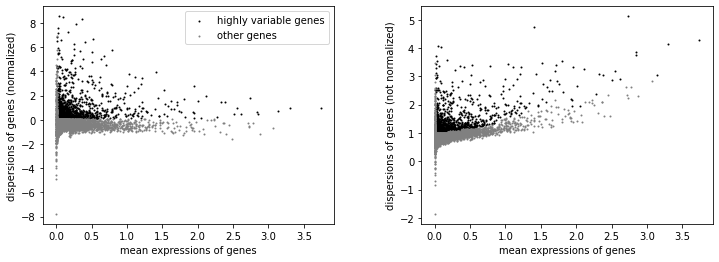

In [24]:
sc.pl.highly_variable_genes(arabi_single_cell_slimmed_to_orthologs)


In [25]:
sc.pp.pca(arabi_single_cell_slimmed_to_orthologs)
sc.pp.neighbors(arabi_single_cell_slimmed_to_orthologs)
sc.tl.umap(arabi_single_cell_slimmed_to_orthologs)

In [26]:
sc.tl.leiden(arabi_single_cell_slimmed_to_orthologs)

In [27]:
arabi_single_cell_slimmed_to_orthologs

AnnData object with n_obs × n_vars = 20224 × 4903
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54', 'leiden'
    var: 'features', 'Arabidopsis Gene', 'GRM Name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [28]:
sc.set_figure_params(facecolor = 'white', figsize = (15,15))

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'RNA_snn_res.0.5' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` para

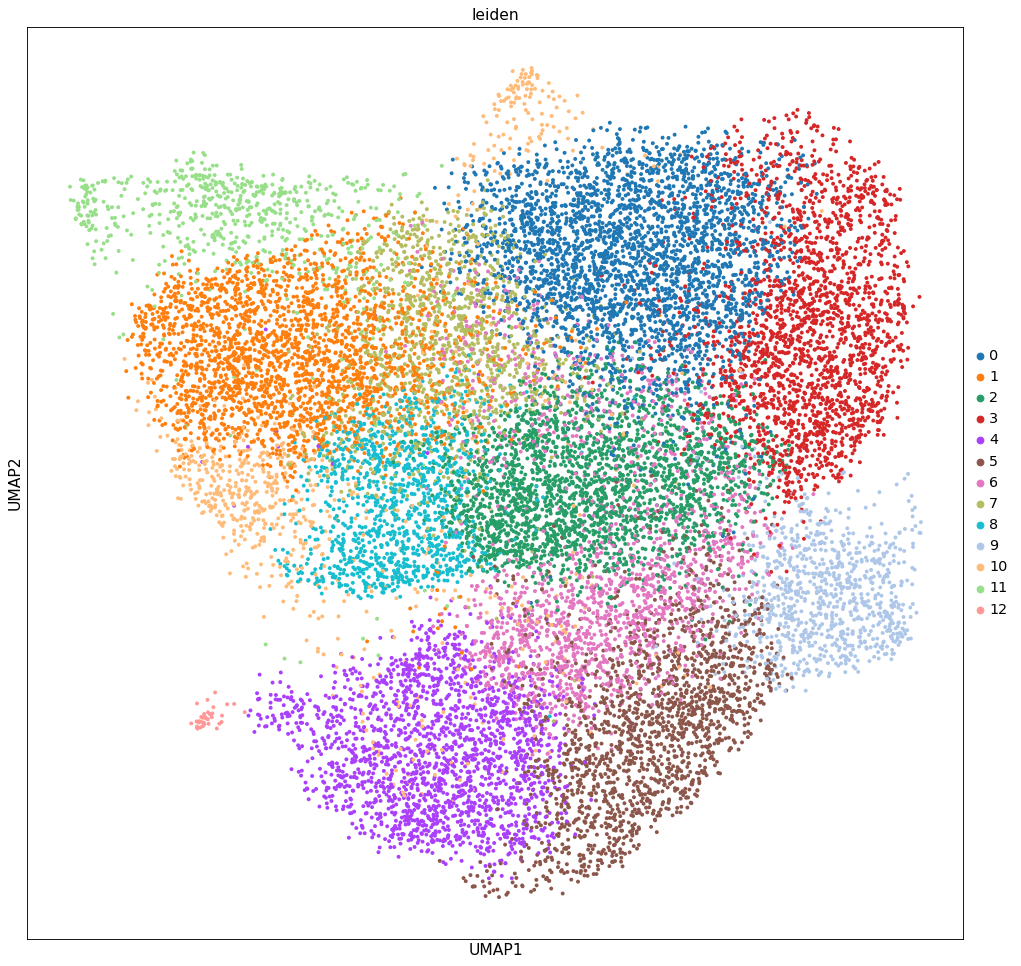

In [29]:
sc.pl.umap(arabi_single_cell_slimmed_to_orthologs, color= 'leiden', s = 50)

In [30]:
arabi_single_cell.obs['leiden'] = arabi_single_cell_slimmed_to_orthologs.obs['leiden']

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'RNA_snn_res.0.5' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` para

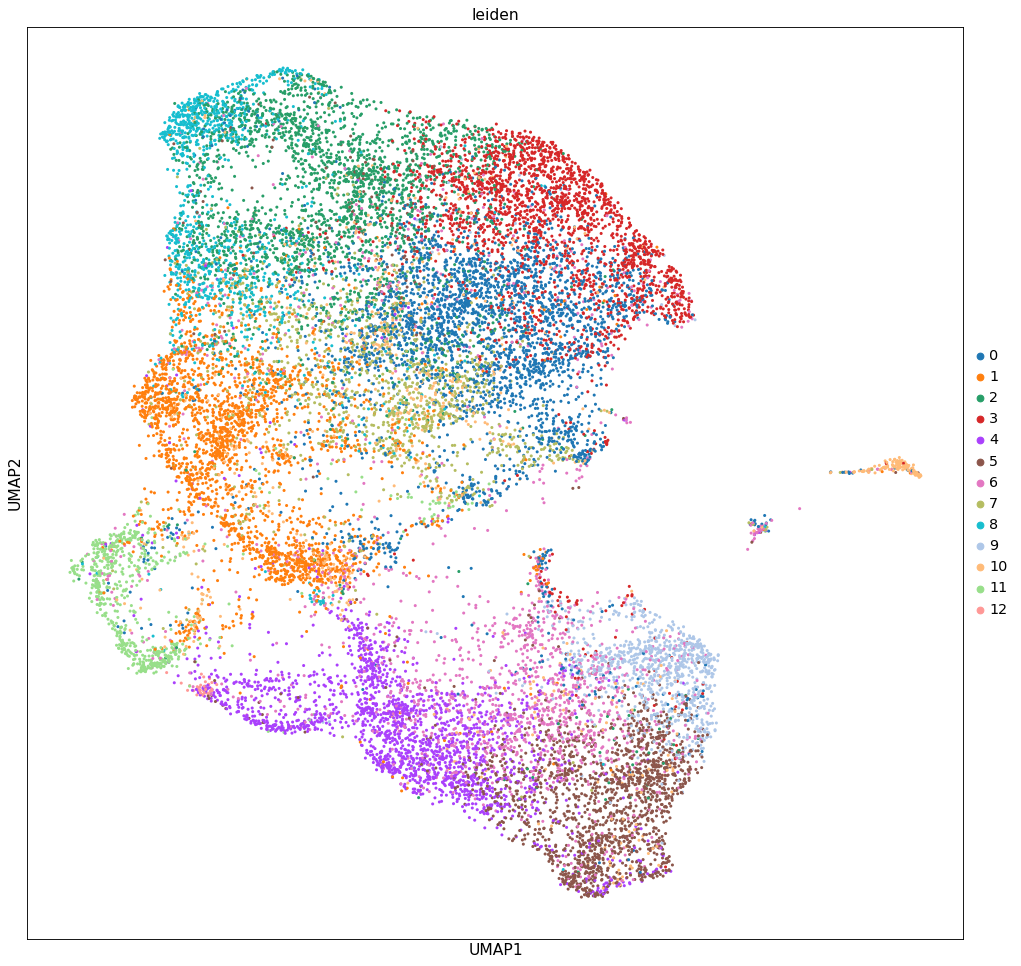

In [31]:
sc.pl.umap(arabi_single_cell, color= 'leiden', s = 30)

In [32]:
#sc.pl.umap(arabi_single_cell_slimmed_to_orthologs, color= 'AT1G76540', s = 50)

In [33]:
maize_single_cell_trimmed_to_orthologs.X.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.50769863, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [44]:
sc.tl.ingest(maize_single_cell_trimmed_to_orthologs,arabi_single_cell_slimmed_to_orthologs, obs = 'leiden')
maize_single_cell_trimmed_to_orthologs.uns['leiden_colors'] = arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors']  # fix colors


AnnData object with n_obs × n_vars = 20224 × 4903
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54', 'leiden'
    var: 'features', 'Arabidopsis Gene', 'GRM Name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'DataSet' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in

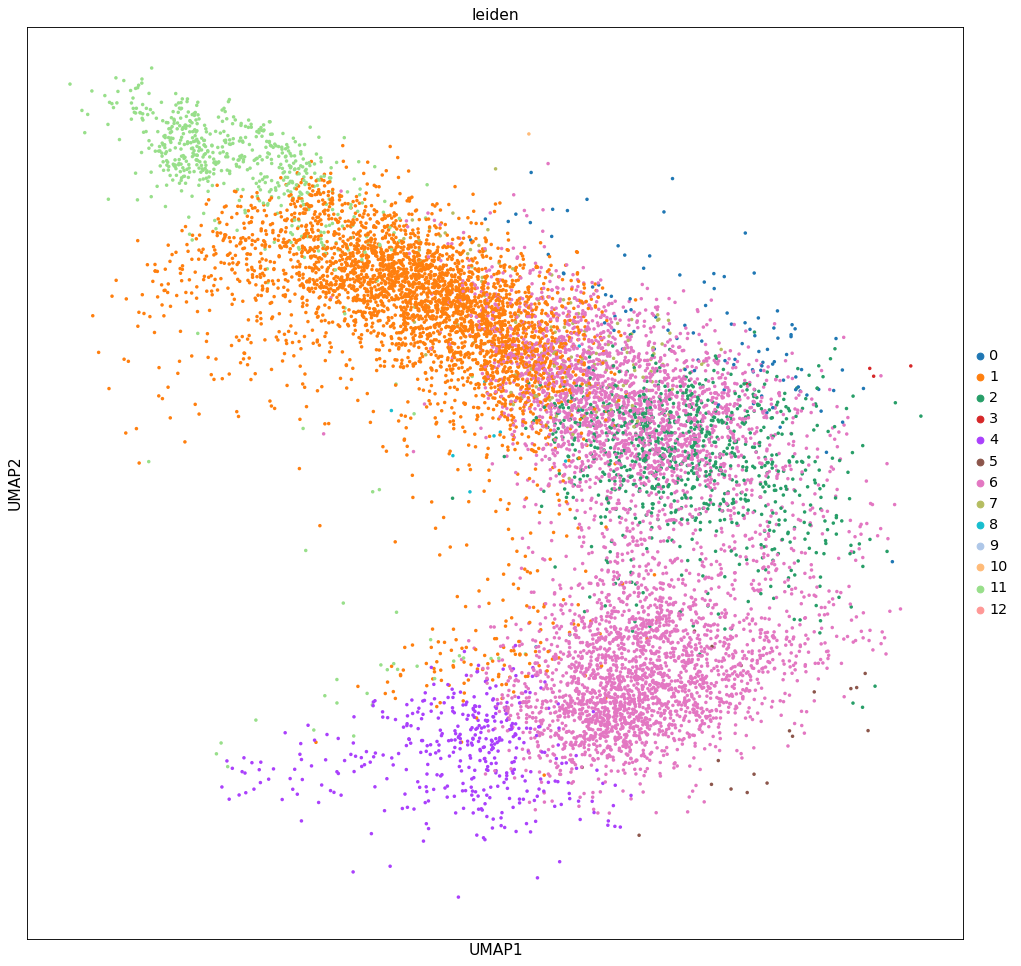

In [45]:
sc.pl.umap(maize_single_cell_trimmed_to_orthologs, color='leiden', wspace=0.5, s = 40)


In [46]:
concatendated_arabi_maize_dataset = arabi_single_cell_slimmed_to_orthologs.concatenate(maize_single_cell_trimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Arabidopsis','Maize'])

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical


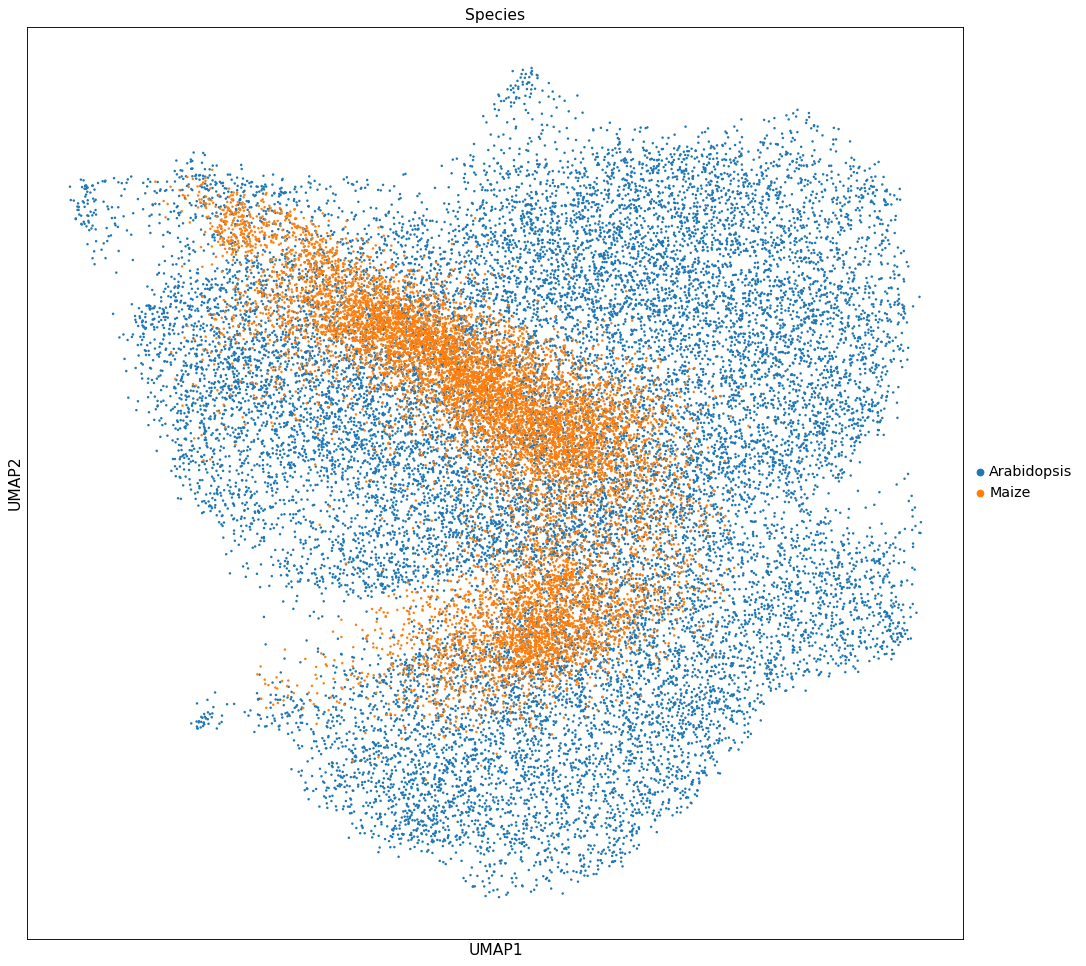

In [47]:
sc.pl.umap(concatendated_arabi_maize_dataset, color='Species', s= 20, palette =['tab:blue','tab:orange'])


In [51]:
concatendated_arabi_maize_dataset.obs.leiden = concatendated_arabi_maize_dataset.obs.leiden.astype('category')
concatendated_arabi_maize_dataset.obs.leiden.cat.reorder_categories(arabi_single_cell_slimmed_to_orthologs.obs.leiden.cat.categories, inplace=True)  # fix category ordering
concatendated_arabi_maize_dataset.uns['leiden_colors'] = arabi_single_cell_slimmed_to_orthologs.uns['leiden_colors']  # fix category colors




/tmp/ipykernel_2706041/3390436726.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  concatendated_arabi_maize_dataset.obs.leiden.cat.reorder_categories(arabi_single_cell_slimmed_to_orthologs.obs.leiden.cat.categories, inplace=True)  # fix category ordering


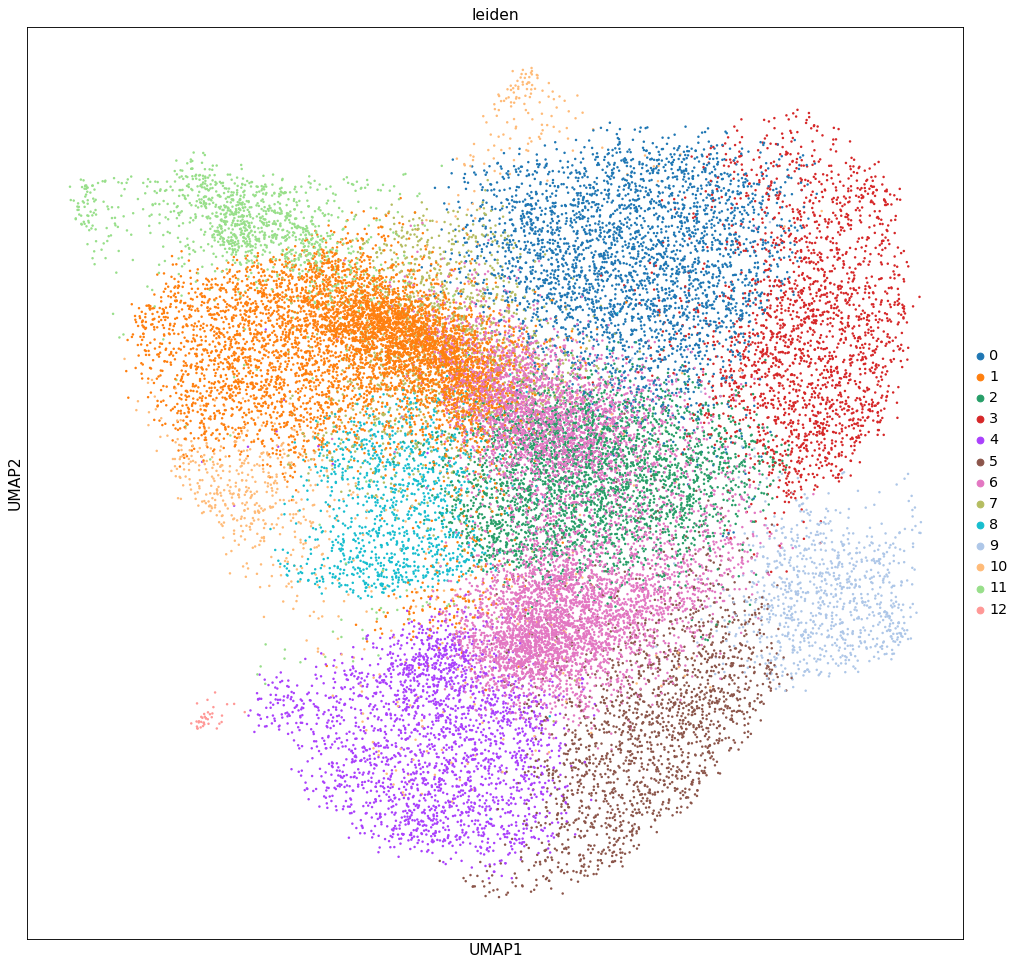

In [52]:
sc.pl.umap(concatendated_arabi_maize_dataset, color='leiden', s= 20)


In [ ]:
sc.tl.pca(concatendated_arabi_maize_dataset)

In [ ]:
bbknn.bbknn(concatendated_arabi_maize_dataset,batch_key='Species')


In [ ]:
concatendated_arabi_maize_dataset

In [ ]:
sc.tl.umap(concatendated_arabi_maize_dataset)

In [ ]:
sc.pl.umap(concatendated_arabi_maize_dataset, color ='Species', s = 45)